Idan Rosenberg 315006882

## **Intro to ML- Final Assigment**
#### Model overview: 
- Fully Connected neural-network
- Model uses Mini-Batch Stochastic Gradient Descent algorithm
- Built in dataloader object to generate batches (to hopefully reduce memory consumption)



In [ ]:
from neural_network import NeuralNetwork
from activation_layer import ReLu, Sigmoid
from loss_fn import MSE
from sklearn.model_selection import train_test_split
from utils import *
import shutil

!mkdir "res"
shutil.rmtree('sample_data')

### Fetch MNIST
a subset of 10k samples of MNIST will be used to test and fine-tune the network, 20% of dataset will be kept aside for testing

In [53]:
data, target = fetch_mnist(sample_num=10000, normalize=True, shuffle_data=True)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

### Question 2- Initial training and testing (before optimizing): 

In [54]:
# train network
network = NeuralNetwork(layers=[100, 10], input_dim=784, activation_fn=Sigmoid, output_fn=Sigmoid, loss_fn=MSE)
network.fit(X_train, y_train, learning_rate=1e-1, batch_size=64, test_train_ratio=0.2,
            epoch_num=20)

######################################################################
# Network Structure:
# 0) <class 'fc_layer.FCLayer'> (In_Dim: 784, Out_Dim: 100)
# 1) <class 'activation_layer.Sigmoid'>
# 2) <class 'fc_layer.FCLayer'> (In_Dim: 100, Out_Dim: 10)
# 3) <class 'activation_layer.Sigmoid'>
###################################################################### 

Epoch 0
train loss: 0.11932670027059702
train acc: 0.14890625
validation loss: 0.09247916507907751
validation acc: 0.194375
----------------------------------------
Epoch 1
train loss: 0.0906280482972421
train acc: 0.22703125
validation loss: 0.08955714615814632
validation acc: 0.296875
----------------------------------------
Epoch 2
train loss: 0.08924529158715666
train acc: 0.30171875
validation loss: 0.08888047822525881
validation acc: 0.33625
----------------------------------------
Epoch 3
train loss: 0.08877328433379264
train acc: 0.335625
validation loss: 0.08849751734137108
validation acc: 0.368125
---------------------

In [57]:
# test network
test_accuracy = network.score(X_test, y_test)
print(f"test accuracy for initial run: {test_accuracy}")

test accuracy for initial run: 0.4485


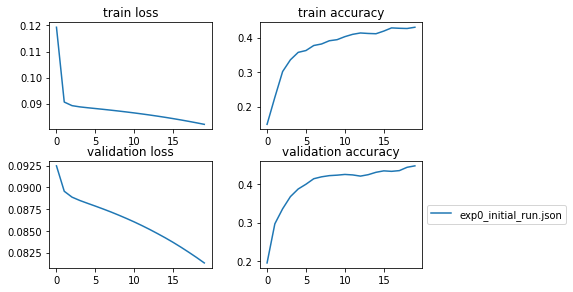

In [56]:
plot_exp_results(filename_pattern="exp0*.json", results_dir='res')

### Question 3- Optimizing Network
##### Part 1- Optimizing Architecture: 
##### let's try a variety of hidden layers configurations:


In [ ]:
layers = [[100, 10], [200, 10], [500, 10], [500, 200, 10]]
for layer in layers:
    # add layers to json file name
    str_lst = list(map(str, layer))
    layers_str = '_'.join(str_lst)
    experiment_name = "exp1_hidden_layer_" + layers_str

    # train network
    network = NeuralNetwork(layers=layer, input_dim=784, activation_fn=Sigmoid, output_fn=Sigmoid, loss_fn=MSE)
    network.fit(X_train, y_train, learning_rate=1e-1, batch_size=64, test_train_ratio=0.2,
                epoch_num=40, json_file_name=experiment_name)

    # test network
    test_accuracy = network.score(X_test, y_test)
    print(f"test accuracy for {experiment_name}: {test_accuracy}")

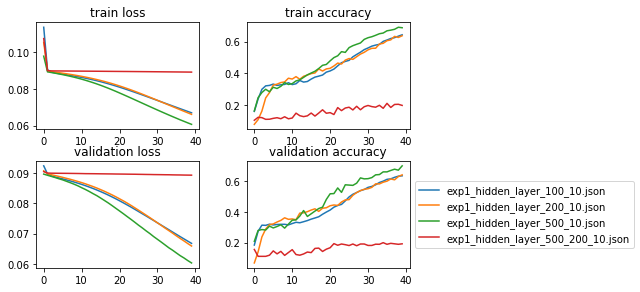

In [34]:
plot_exp_results(filename_pattern="exp1*.json", results_dir='res')

The best performance was achieved with a one hidden layer of dimemsion 500 



#### Part 2- Optimizing Learning Rate:

In [ ]:
for lr in [1e-2, 1e-1, 8e-1, 1e-0]:
    experiment_name = f"exp2_lr_{lr}"

    # train network
    network = NeuralNetwork(layers=[500, 10], input_dim=784, activation_fn=Sigmoid, output_fn=Sigmoid, loss_fn=MSE)
    network.fit(X_train, y_train, learning_rate=lr, batch_size=64, test_train_ratio=0.2,
                epoch_num=40, json_file_name=experiment_name)

    # test network
    test_accuracy = network.score(X_test, y_test)
    print(f"test accuracy for {experiment_name}: {test_accuracy}")

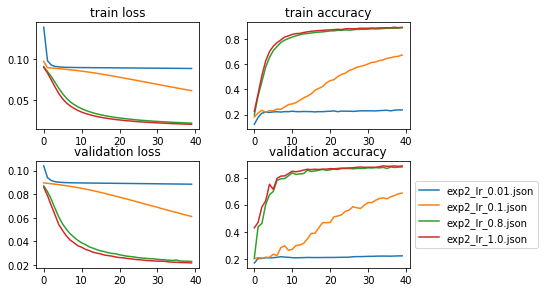

In [30]:
plot_exp_results(filename_pattern="exp2*.json", results_dir='res')

Suprisingly, the best results were achieved with lr value of 1 (1e-0).

#### Part 3- Additional Optimization Attempts: 
Replacing sigmoid with ReLu:

In [ ]:
for lr in [1e-3, 1e-2, 1e-1, 1e-0]:
    experiment_name = f"exp3_ReLu_{lr}"

    # train network
    network = NeuralNetwork(layers=[500, 10], input_dim=784, activation_fn=ReLu, output_fn=ReLu, loss_fn=MSE)
    network.fit(X_train, y_train, learning_rate=lr, batch_size=64, test_train_ratio=0.2,
                epoch_num=40, json_file_name=experiment_name)

    # test network
    test_accuracy = network.score(X_test, y_test)
    print(f"test accuracy for {experiment_name}: {test_accuracy}")

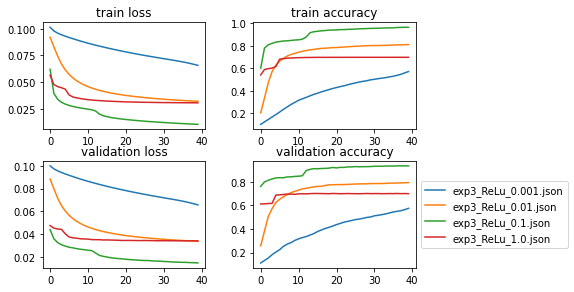

In [33]:
plot_exp_results(filename_pattern="exp3*.json", results_dir='res')

ReLu with learning rate of 1e-1 learning rate is far superior to the rest of the lr values in this experiment, and also the best performing overall. (5% improvement over the best sigmoid model)

In [45]:
data, target = fetch_mnist(sample_num=25000, normalize=True, shuffle_data=True)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

### Part 4- Train model with final architecture and hyper-paramters: 
on a larger 25k samples subset of MNIST

In [46]:
experiment_name = "exp4_25k_samples"

# train network
network = NeuralNetwork(layers=[500, 10], input_dim=784, activation_fn=ReLu, output_fn=ReLu, loss_fn=MSE)
network.fit(X_train, y_train, learning_rate=1e-1, batch_size=64, test_train_ratio=0.2,
                epoch_num=20, json_file_name=experiment_name)

######################################################################
# Network Structure:
# 0) <class 'fc_layer.FCLayer'> (In_Dim: 784, Out_Dim: 500)
# 1) <class 'activation_layer.ReLu'>
# 2) <class 'fc_layer.FCLayer'> (In_Dim: 500, Out_Dim: 10)
# 3) <class 'activation_layer.ReLu'>
###################################################################### 

Epoch 0
train loss: 0.06062537540079991
train acc: 0.56625
validation loss: 0.04791598208023502
validation acc: 0.66775
----------------------------------------
Epoch 1
train loss: 0.044582427448180674
train acc: 0.6895
validation loss: 0.042839140340755075
validation acc: 0.695
----------------------------------------
Epoch 2
train loss: 0.03526137730399309
train acc: 0.7834375
validation loss: 0.03157549738025273
validation acc: 0.81
----------------------------------------
Epoch 3
train loss: 0.029425655906791404
train acc: 0.8254375
validation loss: 0.025381356585966387
validation acc: 0.88175
-------------------------------------

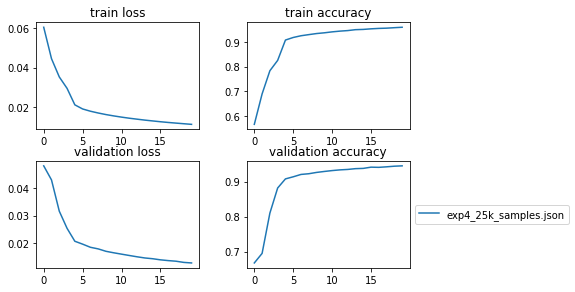

In [48]:
plot_exp_results(filename_pattern="exp4*.json", results_dir='res')

In [50]:
# test network
test_accuracy = network.score(X_test, y_test)
print(f"test accuracy for {experiment_name}: {test_accuracy}")

test accuracy for exp4_25k_samples: 0.9406


final test accuracy of 94%

In [51]:
%%shell
jupyter nbconvert --to html /content/intro_to_ML_final.ipynb

[NbConvertApp] Converting notebook /content/intro_to_ML_final.ipynb to html
[NbConvertApp] Writing 500060 bytes to /content/intro_to_ML_final.html
